In [1]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>
(1944, 2592)


1.9074590428106182

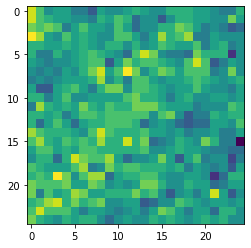

In [2]:
img = cv2.imread('./imgs_E/E50000_G0.png')
print(type(img))
# cv2.imshow('test', img)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img[1400-20:1400+5, 1747-20:1747+5, ::-1])
plt.imshow(img_gray[1400-20:1400+5, 1747-20:1747+5])
print(img_gray.shape)
np.std(img_gray[1400-20:1400+5, 1747-20:1747+5])
# cv2.imshow('test', img[1000-10:1000+10, 2000-10:2000+10, :])

In [3]:
path = './imgs_E'
expo, fixn = [], []
for filename in os.listdir(path):
    expo.append(int(filename.split('_')[0][1:]))
    imgs = cv2.imread(os.path.join(path, filename))
    img_gray = cv2.cvtColor(imgs, cv2.COLOR_RGB2GRAY)
    fixn.append(np.std(imgs[1400-10:1400+10, 1747-10:1747+10]))


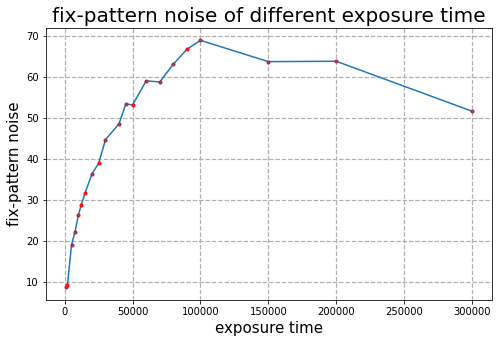

In [5]:
x, y = zip(*sorted(zip(expo, fixn), key=lambda x: x[0]))
plt.figure(figsize=(8, 5))
plt.plot(x[3:24], y[3:24], marker='o', markersize=3, markeredgecolor='r')
plt.title('fix-pattern noise of different exposure time', fontsize=20)
plt.ylabel('fix-pattern noise', fontsize=15)
plt.xlabel('exposure time', fontsize=15)
plt.grid(ls='--', linewidth=1.2)
plt.show()

In [7]:
path = './imgs_G'
gain, fixg = [], []
for filename in os.listdir(path):
    gain.append(int(filename.split('_')[1][1:]))
    imgs = cv2.imread(os.path.join(path, filename))
    img_gray = cv2.cvtColor(imgs, cv2.COLOR_RGB2GRAY)
    fixg.append(np.std(imgs[1400-10:1400+10, 1747-10:1747+10]))

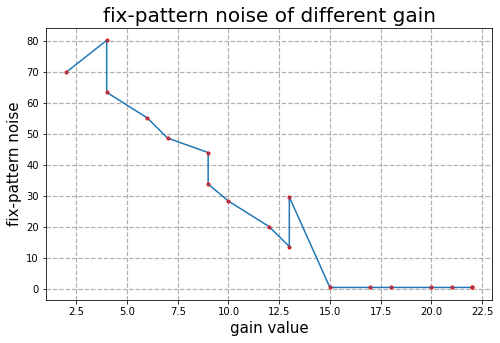

In [9]:
x, y = zip(*sorted(zip(gain, fixg), key=lambda x: x[0]))
plt.figure(figsize=(8, 5))
plt.plot(x[3:21], y[3:21], marker='o', markersize=3, markeredgecolor='r')
plt.title('fix-pattern noise of different gain', fontsize=20)
plt.ylabel('fix-pattern noise', fontsize=15)
plt.xlabel('gain value', fontsize=15)
plt.grid(ls='--', linewidth=1.2)
plt.show()

In [33]:
path = 'bonus'
Expos = []
Gain = []
pixels = []
variance = []


for foldername in os.listdir(path):
    params = foldername.split('_')
    Expos.append(int(params[1]))
    Gain.append(int(params[3]))
    samples = []
    for filename in os.listdir(path + '/' + foldername):
        img = cv2.imread(os.path.join(path + '/' + foldername, filename))
        samples.append(np.concatenate((img[20-5:20+5, 20-5:20+5, :], 
                                       img[20-5:20+5, 2500-5:2500+5, :], 
                                       img[972-5:972+5, 1235-5:1235+5, :],
                                       img[1900-5:1900+5, 20-5:20+5, :],
                                       img[1900-5:1900+5, 2500-5:2500+5, :]), axis = 0))

    R = np.stack(list(img[:, :, 0] for img in samples), axis = 2)
    G = np.stack(list(img[:, :, 1] for img in samples), axis = 2)
    B = np.stack(list(img[:, :, 2] for img in samples), axis = 2)
    variance.append(np.mean([np.mean(np.var(R, axis = 2)), np.mean(np.var(G, axis = 2)), np.mean(np.var(B, axis = 2))]))

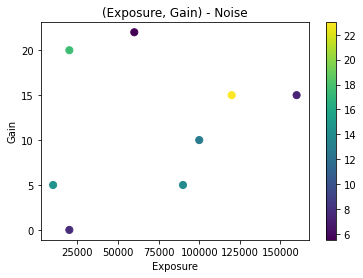

In [37]:
x, y, z = zip(*sorted(zip(Expos, Gain, variance)))
fig, ax = plt.subplots()
scat = ax.scatter(list(e*10**4 for e in x), y, c=z, s=50, marker='o')
fig.colorbar(scat)
plt.title('(Exposure, Gain) - Noise')
plt.xlabel('Exposure')
plt.ylabel('Gain')
plt.show()

In [36]:
a = np.array([[9,2], [3,4]])
b = np.array([[3,4], [1,2]])
print(np.var(np.stack([a,b], axis = 2), axis = 2))

[[9. 1.]
 [1. 1.]]
